In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Problem Statment


In [2]:
## To predict the charges of insurance


# Data Gathering


In [3]:
df=pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
## Here Null value are not present in our data

In [8]:
df["sex"].replace({"female":0,"male":1},inplace=True)


In [9]:
sex_value={"female":0,"male":1}

In [10]:
df["smoker"].replace({"yes":0,"no":1},inplace=True)

In [11]:
smoker_value={"yes":0,"no":1}

In [12]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df=pd.get_dummies(df,columns=["region"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# Outliers

<AxesSubplot:>

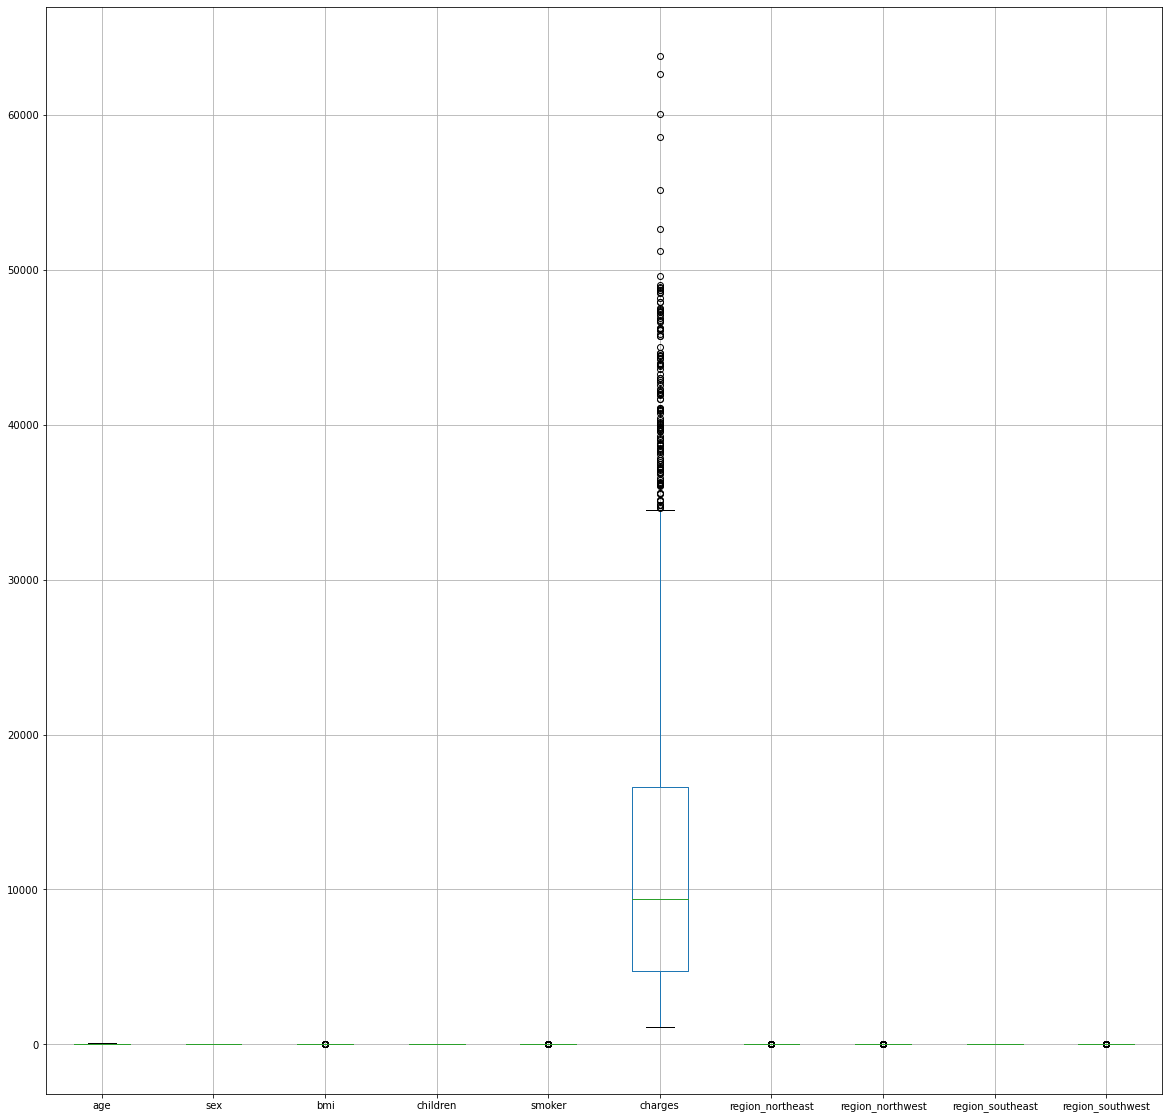

In [15]:
plt.figure(figsize=(20,20))
df.boxplot()

In [16]:
#age

In [17]:
df["age"].mean()

39.20702541106129

In [18]:
df["age"].median()

39.0

In [19]:
## here mean and median are near about same so We conclude that outliers not present in age column

In [20]:
q1=df["age"].quantile(0.25)
print(q1)

q3=df["age"].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)
ul=q3+1.5*(iqr)
print(ul)
ll=q1-1.5*(iqr)
print(ll)


27.0
51.0
24.0
87.0
-9.0


In [21]:
df[["age"]].loc[(df["age"]>ul )| (df["age"]<ll)]

,age


In [22]:
#bmi


In [23]:
q1=df["bmi"].quantile(0.25)
print(q1)

q3=df["bmi"].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)
ul=q3+1.5*(iqr)
print(ul)
ll=q1-1.5*(iqr)
print(ll)


26.29625
34.69375
8.3975
47.290000000000006
13.7


In [24]:
df[["bmi"]].loc[(df["bmi"]>ul )| (df["bmi"]<ll)]

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


In [25]:
median_bmi=df[["bmi"]].loc[(df["bmi"]<ul)&(df["bmi"]>ll)].median()[0]
median_bmi

30.3

In [26]:
df.loc[(df["bmi"]>ul)|(df["bmi"]<ll),"bmi"]=median_bmi


In [27]:
#children

In [28]:
q1=df["children"].quantile(0.25)
print(q1)

q3=df["children"].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)
ul=q3+1.5*(iqr)
print(ul)
ll=q1-1.5*(iqr)
print(ll)


0.0
2.0
2.0
5.0
-3.0


In [29]:
df[["children"]].loc[(df["children"]>ul )| (df["children"]<ll)]

,children


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [31]:
## asuumption

In [32]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.114273,0.042469,0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.039736,0.017163,-0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.114273,0.039736,1.000000,0.017377,0.002943,0.190559,-0.135819,-0.128304,0.253677,0.000733
children,0.042469,0.017163,0.017377,1.000000,-0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,0.025019,-0.076185,0.002943,-0.007673,1.000000,-0.787251,-0.002811,0.036945,-0.068498,0.036945
charges,0.299008,0.057292,0.190559,0.067998,-0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.135819,-0.022808,-0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.128304,0.024806,0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.253677,-0.023066,-0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,0.000733,0.021914,0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


# Train Test split

In [33]:
x=df.drop("charges",axis=1)
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,0,0,0,1
1,18,1,33.770,1,1,0,0,1,0
2,28,1,33.000,3,1,0,0,1,0
3,33,1,22.705,0,1,0,1,0,0
4,32,1,28.880,0,1,0,1,0,0


In [34]:
y=df["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [35]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


# Model Train

In [37]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Model Testing

In [38]:
## Test data

In [39]:
y_pred=model.predict(x_test)

In [40]:
mse=mean_squared_error(y_pred,y_test)
print("mse is",mse)
print()
mae=mean_absolute_error(y_pred,y_test)
print("mae is",mae)
print()

r2=r2_score(y_pred,y_test)
print("r2 score is",r2)

mse is 37943608.559755094

mae is 4221.654983007009

r2 score is 0.6675171439003316


In [41]:
# training data set

In [42]:
y_pred=model.predict(x_train)

mse=mean_squared_error(y_pred,y_train)
print("mse is",mse)
print()
mae=mean_absolute_error(y_pred,y_train)
print("mae is",mae)
print()

r2=r2_score(y_pred,y_train)
print("r2 score is",r2)




mse is 36474108.99235315

mae is 4131.593274750964

r2 score is 0.6656896772699452


#  Testing on single row

In [43]:
column_names=x.columns

len(column_names)

9

In [44]:
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [45]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,0.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [46]:
age=30
sex="male"
bmi=29
children=0
smoker="no"
region="southwest"

#charges=?

In [47]:
print(sex_value)
print()
print(smoker_value)
print()
print(column_names)


{'female': 0, 'male': 1}

{'yes': 0, 'no': 1}

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [48]:
project_data={"sex":sex_value,"smoker":smoker_value,"columns":list(column_names)}
project_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'yes': 0, 'no': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [49]:
project_data["sex"][sex]

1

In [50]:
project_data["smoker"][smoker]

1

In [51]:
region="region_"+region

In [52]:
region_index =np.where(column_names==region)
region_index

(array([8], dtype=int64),)

In [53]:
array=np.zeros(x.shape[1])
array[0]=age
array[1]=project_data["sex"][sex]
array[2]=bmi
array[3]=children
array[4]=project_data["smoker"][smoker]
array[region_index]=1
print(array)

[30.  1. 29.  0.  1.  0.  0.  0.  1.]


In [54]:
model.predict([array])

C:\Users\SIR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4495.80993839])

In [55]:
model.predict([array])[0]

C:\Users\SIR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4495.809938393362

In [56]:
import pickle

In [57]:
with open("linear_medical_insurance_model.pkl","wb") as f:
    pickle.dump(model,f)
    

In [58]:
import json

with open("project_data.json", "w") as f:
    json.dump(project_data, f)